![](https://i.imgur.com/JsMvGnP.png)

## Projeto - Classificação

## 1. Considerações iniciais

Neste notebook vamos praticar a construção de um modelo de Machine Learning. Mais especificamente, iremos utilizar um algoritmo para realizar um processo de classificação. Propositalmente, evitaremos adentrar em algoritmos e explicações mais complexas, pois o foco é percorrer o fluxo do Aprendizado de Máquina por inteiro, ou o máximo dele.

### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes de um serviço que interrompe suas assinaturas dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

In [1156]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [1157]:
df = pd.read_csv('Churn_Modelling.csv')

In [1158]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1159]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 3.1 Análise exploratória

In [1160]:
df.shape

(10000, 14)

In [1161]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [1162]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<AxesSubplot:xlabel='Exited', ylabel='count'>

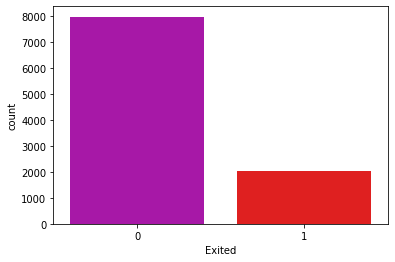

In [1163]:
sns.countplot(x='Exited', palette=["m", "r"],data=df)

<AxesSubplot:xlabel='Age'>

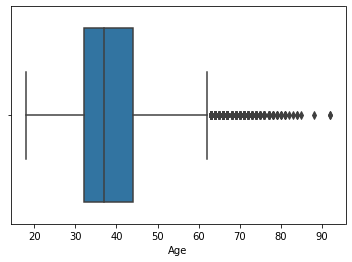

In [1164]:
sns.boxplot(x="Age", data=df)

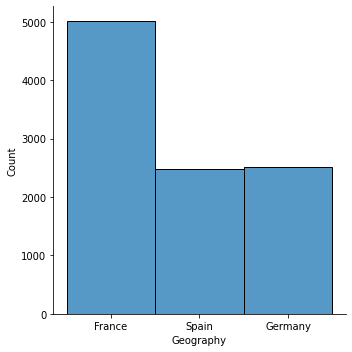

In [1165]:
sns.displot(x="Geography", data=df)

<AxesSubplot:xlabel='Balance'>

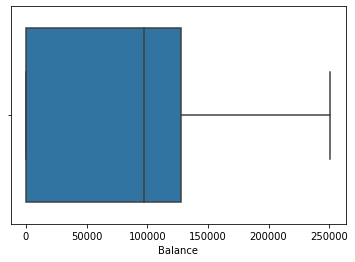

In [1166]:
sns.boxplot(x="Balance", data=df)

<AxesSubplot:xlabel='Tenure'>

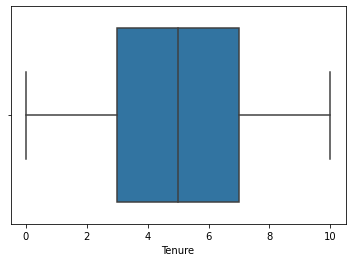

In [1167]:
sns.boxplot(x='Tenure', data=df)

<AxesSubplot:xlabel='CreditScore'>

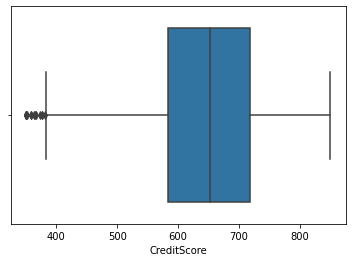

In [1168]:
sns.boxplot(x="CreditScore", data=df)

<AxesSubplot:xlabel='EstimatedSalary'>

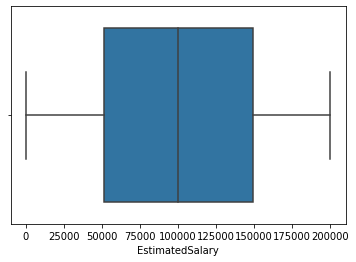

In [1169]:
sns.boxplot(x="EstimatedSalary", data=df)

### 3.2 Preparação e limpeza dos dados

RowNumber: id do registro/linha.
CustomerId: identificador único do cliente.
Surname: sobrenome do cliente.
CreditScore: pontuação de crédito do cliente.
Geography: país de origem do cliente.
Gender: sexo do cliente.
Age: idade do cliente.
Tenure: número de anos em que o cliente está com o banco.
Balance: saldo bancário.
NumOfProducts: número de produtos que o cliente utiliza.
HasCrCard: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
IsActiveMember: indica se o cliente é (1) ou não é (0) ativo no banco.
EstimatedSalary: salário estimado em dólares.
Exited: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).

In [1170]:
df.Gender = pd.Categorical(df.Gender, ['Male', 'Female'])

In [1171]:
df.Gender = df.Gender.cat.codes

In [1172]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [1173]:
df_limpo = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df_limpo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [1174]:
df_limpo.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [1175]:
df_limpo.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,1,28,4,130142.79,1,1,0,38190.78,0


In [1176]:
df_limpo.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [1177]:
colunas = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [1178]:
from sklearn.preprocessing import StandardScaler

In [1179]:
sc=StandardScaler()

In [1180]:
for col in colunas:
    df_limpo[col] = sc.fit_transform(df_limpo[col].values.reshape(-1,1))

In [1181]:
df_limpo

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,Spain,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,France,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,France,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,Spain,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,France,-0.912419,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0
9996,-1.391939,France,-0.912419,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,0
9997,0.604988,France,1.095988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1
9998,1.256835,Germany,-0.912419,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,1


In [1182]:
dummies = pd.get_dummies(df.Geography)

In [1183]:
df_bin = pd.concat([df_limpo,dummies], axis='columns')

In [1184]:
df_bin = df_bin.drop(['Geography'], axis=1)
df_bin.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,-0.326221,1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,1,0,0
1,-0.440036,1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,0,0,1
2,-1.536794,1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,1,0,0
3,0.501521,1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0,1,0,0
4,2.063884,1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,0,0,1


In [1185]:
df_limpo = df_bin

### 3.3 Seleção de atributos

In [1186]:
correlacao = df_limpo.corr()

<AxesSubplot:>

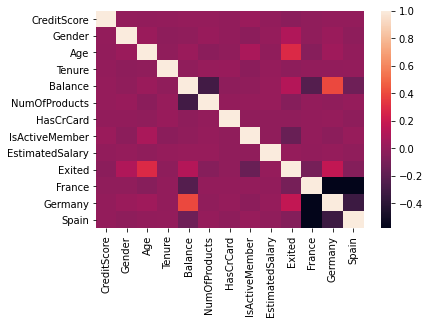

In [1187]:
sns.heatmap(correlacao)

In [1188]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Gender           10000 non-null  float64
 2   Age              10000 non-null  float64
 3   Tenure           10000 non-null  float64
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  float64
 6   HasCrCard        10000 non-null  float64
 7   IsActiveMember   10000 non-null  float64
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
 10  France           10000 non-null  uint8  
 11  Germany          10000 non-null  uint8  
 12  Spain            10000 non-null  uint8  
dtypes: float64(9), int64(1), uint8(3)
memory usage: 810.7 KB


In [1189]:
X = df_limpo.drop(['Exited'], axis=1)
y = df_limpo['Exited']

In [1190]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [1191]:
f_classif = SelectKBest(score_func=f_classif, k=6)

In [1192]:
fit = f_classif.fit(X,y)

In [1193]:
features = fit.transform(X)

In [1194]:
print(features)

[[ 1.09598752  0.29351742 -1.22584767  0.97024255  1.          0.        ]
 [ 1.09598752  0.19816383  0.11735002  0.97024255  0.          0.        ]
 [ 1.09598752  0.29351742  1.33305335 -1.03067011  1.          0.        ]
 ...
 [ 1.09598752 -0.27860412 -1.22584767  0.97024255  1.          0.        ]
 [-0.91241915  0.29351742 -0.02260751 -1.03067011  0.          1.        ]
 [ 1.09598752 -1.04143285  0.85996499 -1.03067011  1.          0.        ]]


In [1195]:
cols = fit.get_support(indices=True)
df_limpo.iloc[:,cols]

,Gender,Age,Balance,IsActiveMember,Exited,France
0,1.095988,0.293517,-1.225848,0.970243,1,1
1,1.095988,0.198164,0.117350,0.970243,0,0
2,1.095988,0.293517,1.333053,-1.030670,1,1
3,1.095988,0.007457,-1.225848,-1.030670,0,1
4,1.095988,0.388871,0.785728,0.970243,0,0
...,...,...,...,...,...,...
9995,-0.912419,0.007457,-1.225848,-1.030670,0,1
9996,-0.912419,-0.373958,-0.306379,0.970243,0,1
9997,1.095988,-0.278604,-1.225848,0.970243,1,1
9998,-0.912419,0.293517,-0.022608,-1.030670,1,0


In [1196]:
df_limpo.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France',
       'Germany', 'Spain'],
      dtype='object')

In [1197]:
df_best = df_limpo.drop(['CreditScore', 'Tenure', 'NumOfProducts',
       'HasCrCard','EstimatedSalary',
       'Germany', 'Spain'], axis=1)
df_best

,Gender,Age,Balance,IsActiveMember,Exited,France
0,1.095988,0.293517,-1.225848,0.970243,1,1
1,1.095988,0.198164,0.117350,0.970243,0,0
2,1.095988,0.293517,1.333053,-1.030670,1,1
3,1.095988,0.007457,-1.225848,-1.030670,0,1
4,1.095988,0.388871,0.785728,0.970243,0,0
...,...,...,...,...,...,...
9995,-0.912419,0.007457,-1.225848,-1.030670,0,1
9996,-0.912419,-0.373958,-0.306379,0.970243,0,1
9997,1.095988,-0.278604,-1.225848,0.970243,1,1
9998,-0.912419,0.293517,-0.022608,-1.030670,1,0


In [1198]:
df_best.columns

Index(['Gender', 'Age', 'Balance', 'IsActiveMember', 'Exited', 'France'], dtype='object')

In [1199]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [1200]:
X = df_best.drop(['Exited'], axis=1)
y = df_best['Exited']

In [1201]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=13)

### 3.4 Construção do modelo

### KNN

In [1202]:
n_neighbors=10

In [1203]:
modelo = KNeighborsClassifier(n_neighbors)
modelo.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1204]:
y_previsto = modelo.predict(X_test)
y_previsto

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1205]:
score_treino = modelo.score(X_train,y_train)

In [1206]:
score_treino

0.8451428571428572

### RandomForest

In [1207]:
from sklearn.ensemble import RandomForestClassifier

In [1208]:
modelo_2 = RandomForestClassifier(n_estimators=300)

In [1209]:
modelo_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1210]:
y_previsto_random_forest = modelo_2.predict(X_test)
y_previsto_random_forest

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1211]:
score_treino = modelo_2.score(X_train,y_train)

In [1212]:
score_treino

0.9647142857142857

### Regressão logística

In [1213]:
from sklearn.linear_model import LogisticRegression

In [1214]:
modelo_log = LogisticRegression()

In [1215]:
modelo_log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1216]:
y_previsto_log = modelo_log.predict(X_test)

In [1217]:
y_previsto_log

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1218]:
score_treino = modelo_log.score(X_train,y_train)

In [1219]:
score_treino

0.8108571428571428

### Decision Tree

In [1220]:
from sklearn import tree

In [1221]:
clf = tree.DecisionTreeClassifier()

In [1222]:
clf = clf.fit(X, y)

In [1235]:
y_previsto_clf = clf.predict(X_test)

In [1236]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [1237]:
score_treino = clf.score(X_train,y_train)

In [1238]:
score_treino

0.9632857142857143

### 3.5 Avaliação do modelo

In [1239]:
from sklearn.metrics import classification_report

In [1240]:
print (classification_report(y_test, y_previsto_log))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2372
           1       0.62      0.19      0.30       628

    accuracy                           0.81      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



In [1246]:
from sklearn.metrics import roc_curve, roc_auc_score

In [1247]:
roc_score = roc_auc_score(y_test, y_previsto_clf)
print("ROC score = {:.2f}%".format(roc_score*100))

ROC score = 89.68%


In [1248]:
roc_fpr, roc_tpr, _ = roc_curve(y_test, y_previsto_clf)

Text(0, 0.5, 'True Positive Rate')

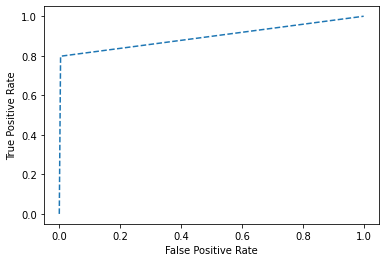

In [1249]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### 3.4 Otimização do modelo

In [1233]:
# seu código

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. Você pode remover variáveis/atributos menos importantes, normalizar variáveis importantes, escolher outros algoritmos de aprendizagem supervisionada, etc. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.

## O melhor modelo foi a Árvore de decisão, com 89% de acurácia. 